In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [161]:
def read_file(path: str) -> np.ndarray:
    """
    0:  FREQ (CM-1)
    1:  WAVLEN (MICRN)
    2:  PATH THERMAL (CM-1)
    3:  PATH THERMAL (MICRN)
    4:  SURFACE EMISSION (CM-1)
    5:  SURFACE EMISSION (MICRN)
    6:  SURFACE REFLECTED (CM-1)
    7:  SURFACE REFLECTED (MICRN)
    8:  TOTAL RADIANCE (CM-1)
    9:  TOTAL RADIANCE (MICRN)
    10: INTEGRAL (CM-1)
    11: TOTAL TRANS
    """
    with open(path) as file:
        lines = [line.rstrip() for line in file]

    i: int = 0
    rows: list = []

    while (i < len(lines)):
        if "RADIANCE(WATTS/CM2-STER-XXX)" in lines[i]:
            i = i + 4
            
            for _ in range(50):
                components: list[str] = lines[i].split()
                numbers: list[float] = [float(x) for x in components]
                rows.append(numbers)
                i = i + 1

        i = i + 1

    return np.array(rows)

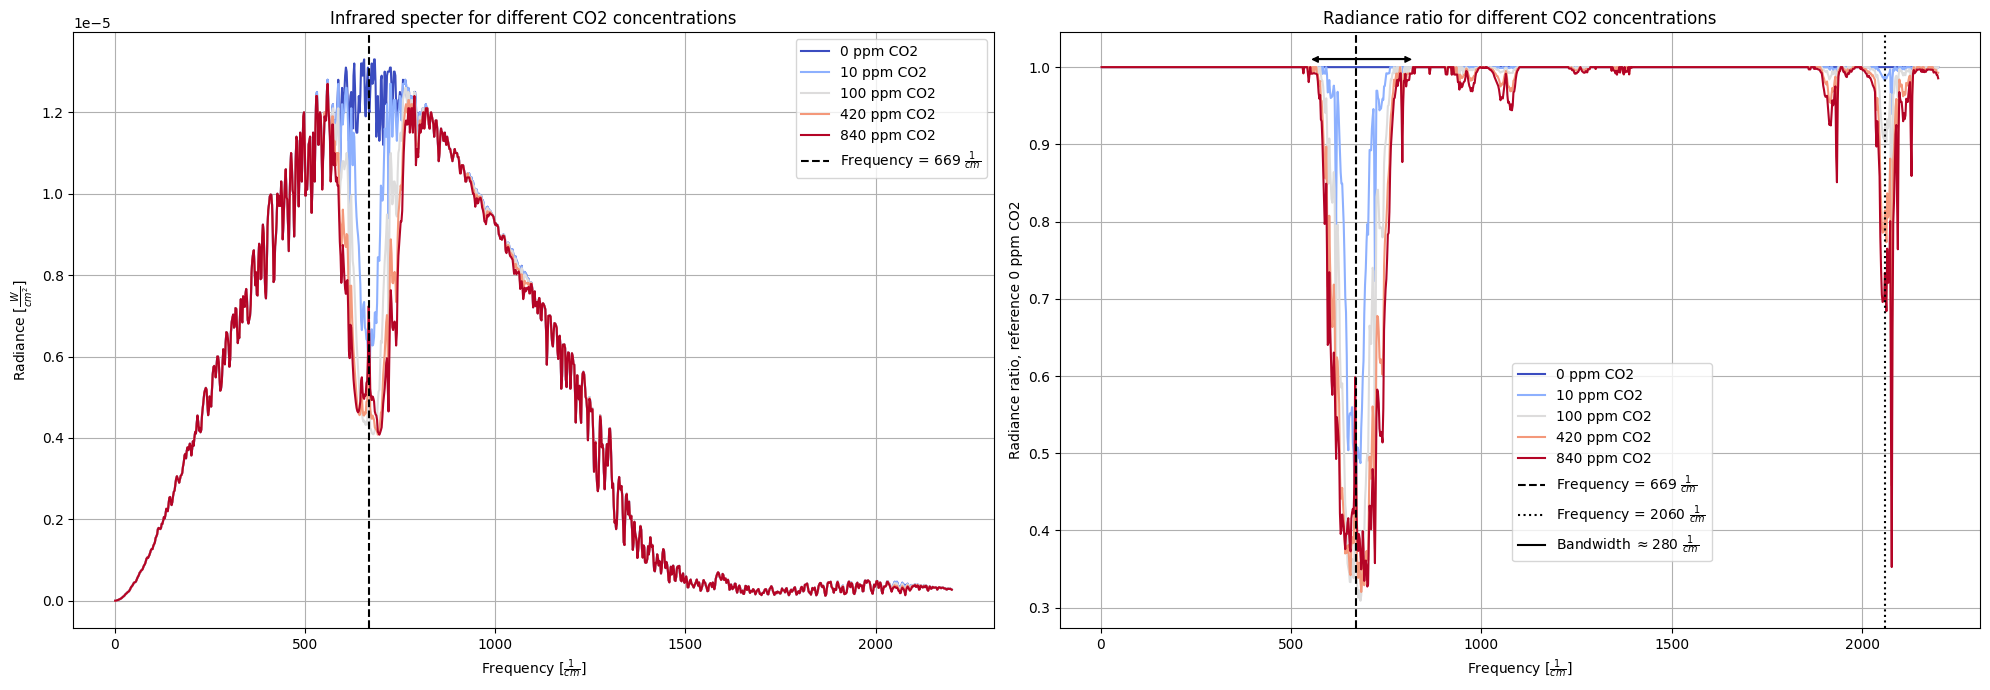

In [162]:
CO2paths: list[list[str]] = [
    ['modtran/modtran0.txt', '0 ppm CO2'],
    ['modtran/modtran10.txt', '10 ppm CO2'],
    ['modtran/modtran100.txt', '100 ppm CO2'],
    ['modtran/modtran420.txt', '420 ppm CO2'],
    ['modtran/modtran840.txt', '840 ppm CO2'],
]


cmap = plt.get_cmap('coolwarm')
norm = mcolors.Normalize(vmin=0, vmax=len(CO2paths) - 1)

CO2_0ppm: np.ndarray = read_file('modtran/modtran0.txt')
f1 = 545
f2 = 825

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

# First subplot
for i, path in enumerate(CO2paths):
    data = read_file(path[0])
    color = cmap(norm(i))
    ax1.plot(data[:, 0], data[:, 8], label=path[1], color=color)

ax1.axvline(x=669, color='k', linestyle='--', label=r'Frequency = 669 $\frac{1}{cm}$')
#ax1.set_facecolor('#d3d3d3')
ax1.grid()
ax1.set_title('Infrared specter for different CO2 concentrations')
ax1.set_xlabel(r'Frequency [$\frac{1}{cm}$]')
ax1.set_ylabel(r'Radiance [$\frac{W}{cm^2}$]')
ax1.legend(loc='upper right')

# Second subplot
for i, path in enumerate(CO2paths):
    data = read_file(path[0])
    color = cmap(norm(i))
    ax2.plot(data[:, 0], data[:, 8] / CO2_0ppm[:, 8], label=path[1], color=color)

ax2.axvline(x=669, color='k', linestyle='--', label=r'Frequency = 669 $\frac{1}{cm}$')
ax2.axvline(x=2060, color='k', linestyle=':', label=r'Frequency = 2060 $\frac{1}{cm}$')
ax2.plot([f1 + 15, f2 - 15], [1.01, 1.01], color='k', linestyle='-', label=rf'Bandwidth $\approx {f2 - f1}$ '+r'$\frac{1}{cm}$')
ax2.annotate('', xy=(f1, 1.01), xytext=(f2, 1.01),
             arrowprops=dict(arrowstyle='<|-|>', color='k'))
#ax2.set_facecolor('#d3d3d3')
ax2.grid()
ax2.set_xlabel(r'Frequency [$\frac{1}{cm}$]')
ax2.set_ylabel('Radiance ratio, reference 0 ppm CO2')
ax2.set_title('Radiance ratio for different CO2 concentrations')
ax2.legend(loc='lower center', bbox_to_anchor=(0.6, +0.1))

plt.tight_layout()
plt.show()